In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import sys
import cv2
import os
import numpy as np
import torch


from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Function to clean a folder of bitmap files
def clean_folder(folder_path):

    if not os.path.exists(folder_path):
        print(f"Folder '{folder_path}' does not exist.")
        return

    print(os.listdir(folder_path))
    # # Iterate through all files in the folder
    # for filename in os.listdir(folder_path):
    #     file_path = os.path.join(folder_path, filename)
    #     # Check if the file is a bitmap (assuming file extension is '.bmp')
    #     if filename.endswith('.bmp'):
    #         # Delete the bitmap file
    #         os.remove(file_path)

# Paths to folders containing bitmap files
output_folder_test_no = "/content/drive/MyDrive/CSE 144 Group 7/archive/Brain_Tumor_Datasets_Bitmaps/test/no"
output_folder_test_yes = "/content/drive/MyDrive/CSE 144 Group 7/archive/Brain_Tumor_Datasets_Bitmaps/test/yes"
output_folder_train_no = "/content/drive/MyDrive/CSE 144 Group 7/archive/Brain_Tumor_Datasets_Bitmaps/train/no"
output_folder_train_yes = "/content/drive/MyDrive/CSE 144 Group 7/archive/Brain_Tumor_Datasets_Bitmaps/train/yes"

# Clean each folder
clean_folder(output_folder_test_no)
clean_folder(output_folder_test_yes)
clean_folder(output_folder_train_no)
clean_folder(output_folder_train_yes)


['Tr-no_0615cannygooder_padded.bmp', 'Tr-no_0524cannygooder_padded.bmp', 'no355cannygooder_padded.bmp', 'Tr-no_1435cannygooder_padded.bmp', 'no1450cannygooder_padded.bmp', 'Tr-no_1472cannygooder_padded.bmp', 'Tr-no_0169cannygooder_padded.bmp', 'Tr-no_1264cannygooder_padded.bmp', 'Tr-no_1193cannygooder_padded.bmp', 'Tr-no_1468cannygooder_padded.bmp', 'Te-no_0197cannygooder_padded.bmp', 'Tr-no_0348cannygooder_padded.bmp', 'Tr-no_1274cannygooder_padded.bmp', 'Tr-no_0950cannygooder_padded.bmp', 'no1025cannygooder_padded.bmp', 'Tr-no_0638cannygooder_padded.bmp', 'Tr-no_0141cannygooder_padded.bmp', 'Tr-no_0605cannygooder_padded.bmp', 'Tr-no_1284cannygooder_padded.bmp', 'N17cannygooder_padded.bmp', 'Tr-no_0258cannygooder_padded.bmp', 'Tr-no_0918cannygooder_padded.bmp', 'Tr-no_0252cannygooder_padded.bmp', 'Tr-no_0062cannygooder_padded.bmp', 'Te-no_0228cannygooder_padded.bmp', 'Tr-no_0659cannygooder_padded.bmp', 'no1316cannygooder_padded.bmp', '24 nocannygooder_padded.bmp', 'no109cannygooder_pa

In [ ]:
# Path to the folder containing PNG images
input_folder: str = "/content/drive/MyDrive/CSE 144 Group 7/archive/Brain_Tumor_Datasets"

# Path to the folder where you want to save the converted bitmap images
output_folder: str = "/content/drive/MyDrive/CSE 144 Group 7/archive/Brain_Tumor_Datasets_Bitmaps"

def convert_folder_img_to_bitmap(input_folder: str, output_folder: str) -> None:
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # List all files in the input folder
    png_files: list[str] = os.listdir(input_folder)

    print("all files: ", png_files)

    # Iterate over each PNG file
    for i,png_file in enumerate(png_files):
        # if i>5:
        #     break
        # Check if the file is a PNG image
        if png_file.lower().endswith('.jpg'):
            # Construct the full path to the PNG file
            png_file: str = os.path.basename(png_file)
            png_file_path: str = os.path.join(input_folder, png_file)

            # Load the image and convert to grayscale
            image = cv2.imread(png_file_path, cv2.IMREAD_GRAYSCALE)
            #image = cv2.medianBlur(image,5)
            image = cv2.Canny(image,100,200)

            # get width and height
            height, width = image.shape[:2]

            # Calculate padding to make the image 512x512
            target_size = 512
            top_pad = max(0, (target_size - height) // 2)
            bottom_pad = max(0, target_size - height - top_pad)
            left_pad = max(0, (target_size - width) // 2)
            right_pad = max(0, target_size - width - left_pad)

            # Add the padding to the image
            scaled_image = cv2.copyMakeBorder(image, top_pad, bottom_pad, left_pad, right_pad,
                                              borderType=cv2.BORDER_CONSTANT, value=0)

            # Get the file name without extension;
            file_name = os.path.splitext(os.path.basename(png_file))[0]

            # Save the image as a bitmap (BMP) file
            cv2.imwrite(os.path.join(output_folder, f"{file_name}cannygooder_padded" + ".bmp"), scaled_image)


# Convert PNG images to bitmaps for test/no and test/yes folders
convert_folder_img_to_bitmap(os.path.join(input_folder, "test/no"), os.path.join(output_folder, "test/no"))
convert_folder_img_to_bitmap(os.path.join(input_folder, "test/yes"), os.path.join(output_folder, "test/yes"))

# Convert PNG images to bitmaps for train/no and train/yes folders
convert_folder_img_to_bitmap(os.path.join(input_folder, "train/no"), os.path.join(output_folder, "train/no"))
convert_folder_img_to_bitmap(os.path.join(input_folder, "train/yes"), os.path.join(output_folder, "train/yes"))


all files:  ['Tr-no_0615.jpg', 'Tr-no_0524.jpg', 'no 5.jpeg', 'no355.jpg', 'Tr-no_1435.jpg', 'no1450.jpg', 'Tr-no_1472.jpg', 'Tr-no_0169.jpg', 'Tr-no_1264.jpg', 'Tr-no_1193.jpg', 'Tr-no_1468.jpg', 'Te-no_0197.jpg', 'Tr-no_0348.jpg', 'Tr-no_1274.jpg', 'Tr-no_0950.jpg', 'no1025.jpg', 'Tr-no_0638.jpg', 'Tr-no_0141.jpg', 'Tr-no_0605.jpg', 'Tr-no_1284.jpg', 'N17.jpg', 'Tr-no_0258.jpg', 'Tr-no_0918.jpg', 'Tr-no_0252.jpg', 'Tr-no_0062.jpg', 'Te-no_0228.jpg', 'Tr-no_0659.jpg', 'no1316.jpg', '24 no.jpg', 'no109.jpg', 'Tr-no_0376.jpg', 'Tr-no_0801.jpg', 'Tr-no_0855.jpg', 'no1106.jpg', 'Tr-no_0859.jpg', 'Te-no_0251.jpg', 'no1129.jpg', '34 no.jpg', 'no1396.jpg', 'no1228.jpg', 'Tr-no_0501.jpg', 'Tr-no_1297.jpg', 'Tr-no_0527.jpg', 'Tr-no_1167.jpg', 'no1306.jpg', 'no1031.jpg', 'Tr-no_0164.jpg', 'no1162.jpg', 'no359.jpg', 'Tr-no_0395.jpg', 'Tr-no_0360.jpg', 'no1377.jpg', 'Tr-no_1262.jpg', 'Tr-no_1088.jpg', 'Tr-no_0754.jpg', 'Tr-no_1519.jpg', 'no224.jpg', 'no1350.jpg', 'Tr-no_1363.jpg', 'Tr-no_0367.jpg

In [ ]:
# # Path to the folder containing bitmap images
# input_folder: str = "/content/drive/MyDrive/CSE 144 Group 7/archive/Brain_Tumor_Datasets_Bitmaps/"

# def smallest_dimension(input_folder: str) -> None:
#     # List all files in the input folder
#     bmp_files: list[str] = os.listdir(input_folder)

#     # Store smallest height and width
#     smallest_height: int = sys.maxsize
#     smallest_width: int = sys.maxsize

#     # print("all files: ", bmp_files)

#     # Iterate over each BMP file
#     sizes = set()
#     for bmp_file_name in bmp_files:
#         # Check if the file is a BMP image
#         if bmp_file_name.lower().endswith('.bmp'):
#             # Construct the full path to the BMP file
#             bmp_file_path: str = os.path.join(input_folder, bmp_file_name)

#             file_name = os.path.splitext(os.path.basename(bmp_file_name))[0]

#             # Load the image
#             image = cv2.imread(bmp_file_path)


#             # Check if the image was loaded successfully
#             if image is not None:
#                 # Get the dimensions
#                 height, width = image.shape[:2]
#                 sizes.add((height,width))

#                 # Update smallest dimensions if necessary
#                 smallest_height = min(smallest_height, height)

#                 smallest_width = min(smallest_width, width)
#     print("SIZES")
#     print(len(sizes))
#     # Print out smallest dimensions
#     print("%s:" % input_folder)
#     print("Smallest height: ", smallest_height)
#     print("Smallest width: ", smallest_width)

# # Find smallest height and width for test/no and test/yes folders
# smallest_dimension(os.path.join(input_folder, "test/no"))
# smallest_dimension(os.path.join(input_folder, "test/yes"))

# # Find smallest height and width for train/no and train/yes folders
# smallest_dimension(os.path.join(input_folder, "train/no"))
# smallest_dimension(os.path.join(input_folder, "train/yes"))


SIZES
125
/content/drive/MyDrive/CSE 144 Group 7/archive/Brain_Tumor_Datasets_Bitmaps/test/no:
Smallest height:  168
Smallest width:  150


In [ ]:
# Path to your image folders
data_path_test = "/content/drive/MyDrive/CSE 144 Group 7/archive/Brain_Tumor_Datasets_Bitmaps/test"
data_path_train = "/content/drive/MyDrive/CSE 144 Group 7/archive/Brain_Tumor_Datasets_Bitmaps/train"

# Define transformations for training and testing datasets
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((64, 64)),  # Resize the image to 64x64
    transforms.ToTensor()            # Convert the image to a PyTorch tensor
])

# Create datasets
test_dataset = datasets.ImageFolder(root=data_path_test, transform=transform)
train_dataset = datasets.ImageFolder(root=data_path_train, transform=transform)

# Split the training data into train and validation sets
train_size = int(0.9 * len(train_dataset))  # 90% of the data for training
val_size = len(train_dataset) - train_size  # 10% of the data for validation
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 128
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Check the lengths
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

print(train_dataset[0][0].shape)
print(val_dataset[0][0].shape)
print(test_dataset[0][0].shape)

6323
703
1760
torch.Size([1, 64, 64])
torch.Size([1, 64, 64])
torch.Size([1, 64, 64])


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def evaluate_model(model, dataloader, is_test=False):
  #Evaluation

  # Set model to evaluation mode
  model.eval()

  with torch.no_grad():
    correct = 0
    loss = 0

    criterion = torch.nn.BCELoss()

    for data, target in dataloader:
        data, target = data.to(device), target.to(device)
        target = target.float()
        outputs = model(data)

        loss += torch.sum(criterion(outputs, target)).item()

        pred = (outputs > 0.5).float()
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    loss /= len(dataloader.dataset)
    accuracy = 100. * correct / len(dataloader.dataset)
    print('\n{} set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        "Test" if is_test else "Validation",
        loss, correct, len(dataloader.dataset),
        accuracy))
  # Set model back to training mode
  model.train()


def train_model(model, num_epochs, criterion, optimizer):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader, 0):
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.float()
            # print("labels: ", labels, " ", labels.shape)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # print("outputs: ", outputs, " ", outputs.shape)


            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Print statistics
            running_loss += loss.item()
            if i % 10 == 9:    # Print every 100 mini-batches
                print('[Epoch %d, Batch %5d] Loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0

        # Evaluate the model on the validation set after each epoch
        evaluate_model(model, valloader)


In [ ]:


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define the convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

        #Flattern the input
        self.flatten = nn.Flatten()

        # Define the dense layers
        self.fc1 = nn.Linear(128 * 64 * 64, 128)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, 1)

        #define sigmoid
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
         # Apply ReLU activation after the convolutional layers
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.relu(self.conv3(x))
        x = nn.functional.relu(self.conv4(x))

        # Flatten the output of the convolutional layers
        x = self.flatten(x)

        # Apply dense layer 1
        x = nn.functional.relu(self.fc1(x))

        # Apply the dropout layer
        x = self.dropout(x)

        # Apply dense layer 2
        x = self.fc2(x)

        # Apply Sigmoid
        x = self.sigmoid(x)

        x = x.squeeze(1)

        return x


In [ ]:
learning_rate = 0.01
epochs = 10
batch_size = 128

model = CNN()
model.to(device)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print("Test Non-Trained Model on Test Set")
evaluate_model(model, testloader)
print("Train Model")
train_model(model, epochs, criterion, optimizer)
print("Test Trained Model on Test Set")
evaluate_model(model, testloader)

Test Non-Trained Model on Test Set

Validation set: Average loss: 0.0055, Accuracy: 1045/1760 (59%)

Train Model
[Epoch 1, Batch    10] Loss: 0.069
[Epoch 1, Batch    20] Loss: 0.068
[Epoch 1, Batch    30] Loss: 0.068
[Epoch 1, Batch    40] Loss: 0.068
[Epoch 1, Batch    50] Loss: 0.068

Validation set: Average loss: 0.0058, Accuracy: 422/703 (60%)

[Epoch 2, Batch    10] Loss: 0.067
[Epoch 2, Batch    20] Loss: 0.067
[Epoch 2, Batch    30] Loss: 0.067
[Epoch 2, Batch    40] Loss: 0.068
[Epoch 2, Batch    50] Loss: 0.067

Validation set: Average loss: 0.0057, Accuracy: 422/703 (60%)

[Epoch 3, Batch    10] Loss: 0.067
[Epoch 3, Batch    20] Loss: 0.067
[Epoch 3, Batch    30] Loss: 0.066
[Epoch 3, Batch    40] Loss: 0.065
[Epoch 3, Batch    50] Loss: 0.063

Validation set: Average loss: 0.0054, Accuracy: 422/703 (60%)

[Epoch 4, Batch    10] Loss: 0.064
[Epoch 4, Batch    20] Loss: 0.061
[Epoch 4, Batch    30] Loss: 0.059
[Epoch 4, Batch    40] Loss: 0.055
[Epoch 4, Batch    50] Loss: 0

In [ ]:
# learning_rate = 0.01
# epochs = 10
# batch_size = 128

# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
# # model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
# model.to(device)

# criterion = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# train_model(model, epochs, criterion, optimizer)


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:01<00:00, 171MB/s]


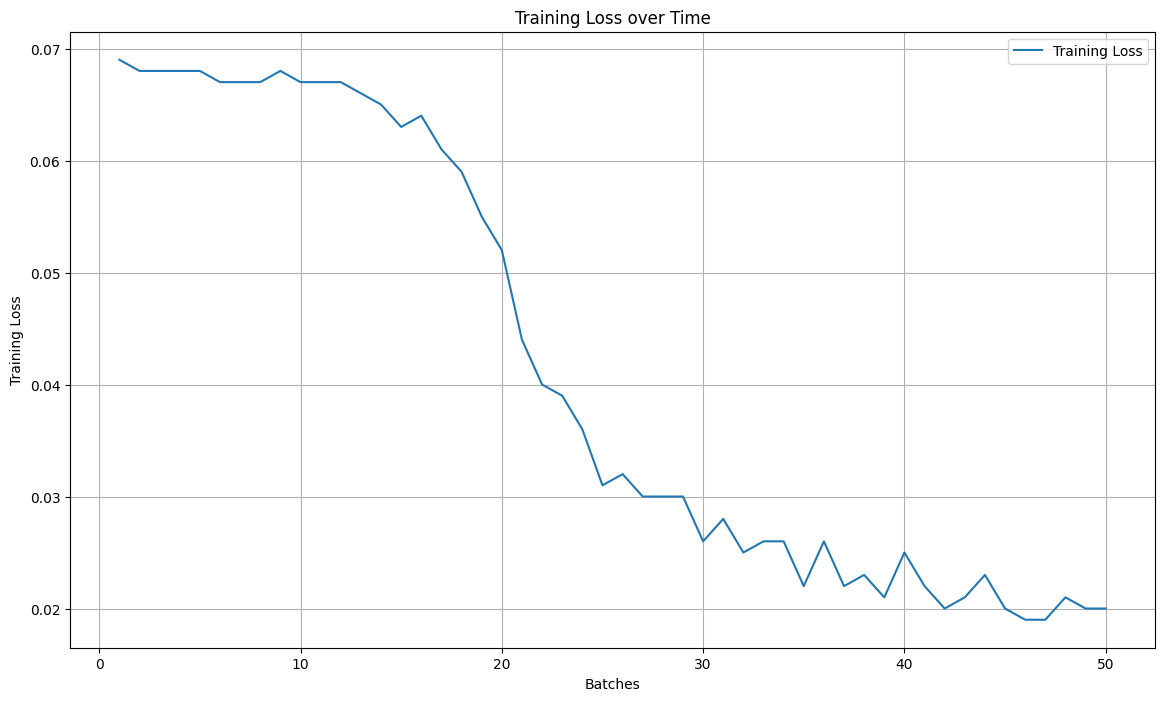

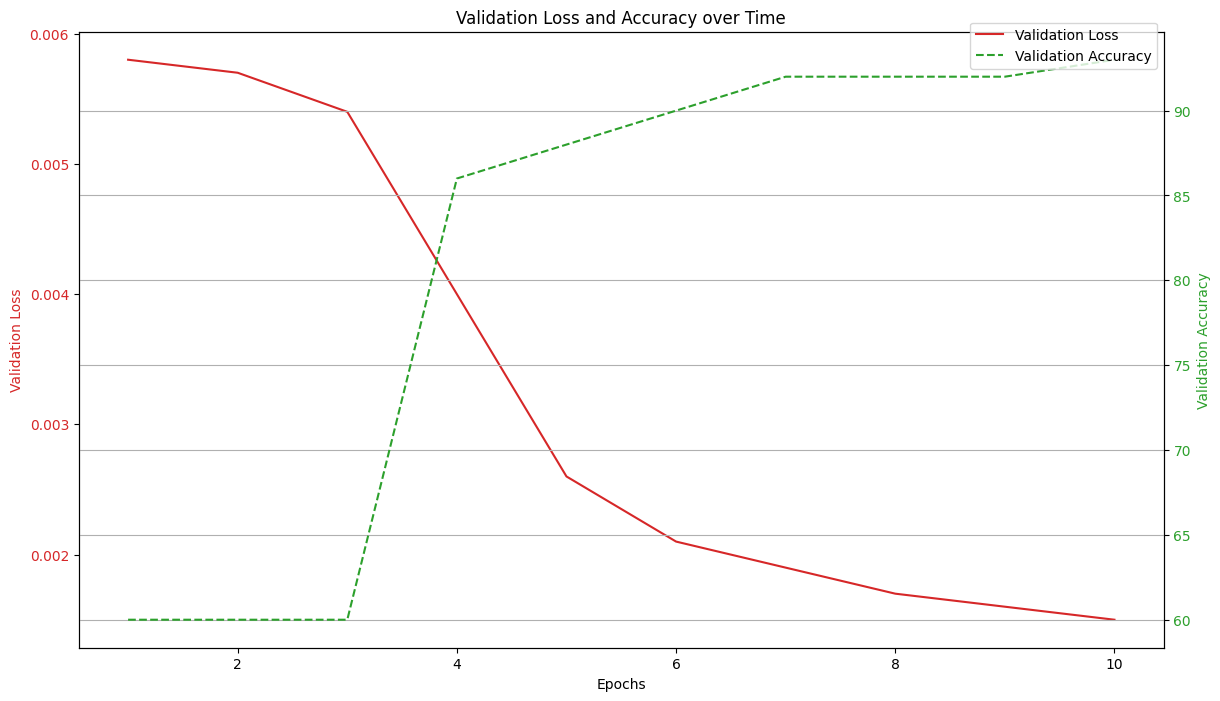

In [3]:
import matplotlib.pyplot as plt

# Training and validation metrics
train_loss_batches = {
    1: [0.069, 0.068, 0.068, 0.068, 0.068],
    2: [0.067, 0.067, 0.067, 0.068, 0.067],
    3: [0.067, 0.067, 0.066, 0.065, 0.063],
    4: [0.064, 0.061, 0.059, 0.055, 0.052],
    5: [0.044, 0.040, 0.039, 0.036, 0.031],
    6: [0.032, 0.030, 0.030, 0.030, 0.026],
    7: [0.028, 0.025, 0.026, 0.026, 0.022],
    8: [0.026, 0.022, 0.023, 0.021, 0.025],
    9: [0.022, 0.020, 0.021, 0.023, 0.020],
    10: [0.019, 0.019, 0.021, 0.020, 0.020]
}

val_loss = [0.0058, 0.0057, 0.0054, 0.0040, 0.0026, 0.0021, 0.0019, 0.0017, 0.0016, 0.0015]
val_accuracy = [60, 60, 60, 86, 88, 90, 92, 92, 92, 93]

epochs = list(train_loss_batches.keys())
batches = range(1, 51, 10)

# Flatten train loss for plotting
train_loss = [loss for epoch in train_loss_batches.values() for loss in epoch]

# Create figure for training loss
fig1, ax1 = plt.subplots(figsize=(14, 8))
ax1.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='tab:blue')
ax1.set_xlabel('Batches')
ax1.set_ylabel('Training Loss')
ax1.set_title('Training Loss over Time')
ax1.grid()
ax1.legend()

# Create figure for validation metrics
fig2, ax2 = plt.subplots(figsize=(14, 8))
ax2.plot(epochs, val_loss, label='Validation Loss', color='tab:red')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Validation Loss', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Create a twin Axes sharing the xaxis
ax3 = ax2.twinx()
ax3.plot(epochs, val_accuracy, label='Validation Accuracy', color='tab:green', linestyle='dashed')
ax3.set_ylabel('Validation Accuracy', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

fig2.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.title('Validation Loss and Accuracy over Time')
plt.grid()

# Show plots
plt.show()
